In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def f(x1,x2):     # начальная функция
    return 10*x1**2 + 3*x1*x2 + x2**2 + 10*x2

def fpr1(x1,x2):  # производная по x1
    return 20*x1 + 3*x2

def fpr2(x1,x2):  # производная по x2
    return 3*x1 + 2*x2 + 10

In [3]:
eps=0.01 # точность метода
x1k1=0   # начальное положение по x1
x2k1=0   # начальное положение по x2

In [11]:
while True:  #метод наискорейшего спуска
    h1=-fpr1(x1k1,x2k1)  #направление по x1
    h2=-fpr2(x1k1,x2k1)  #направление по x2
    a=1
    A=99999999
    
    while(a>0):   # вычисление наилучшего альфа
        argm = f(x1k1-a*fpr1(x1k1,x2k1),x2k1-a*fpr2(x1k1,x2k1))
        if(argm<A):    # нахождение экстремума(точки, после которой знак производной с "-" меняется на "+")
            alf=a
            a=a/2
            A=argm
        else:
            a=-1
    
    x1k2=x1k1+alf*h1
    x2k2=x2k1+alf*h2
    
    if((fpr1(x1k2,x2k2)<eps)and(fpr2(x1k2,x2k2))<eps):    # условие остановки
        break
    else:
        x1k1=x1k2   # новый икс становится предыдущим для следующей итерации
        x2k1=x2k2

print('Минимум достигается в точке (',x1k2,';',x2k2,') и равен ',f(x1k2,x2k2))

Минимум достигается в точке ( 0.9670651151015439 ; -6.445773772292707 ) и равен  -32.25803769594918


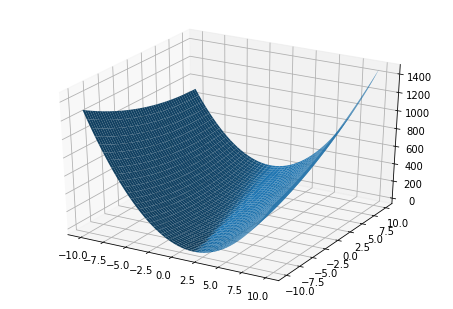

In [7]:
# график
x = np.arange (-5, 5, 0.1)
y = np.arange (-5, 5, 0.1)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)
fig = plt.figure()
axes = Axes3D(fig)
axes.plot_surface(X, Y, Z)
plt.show()